In [1]:
# BIRCH是用层次方法来聚类和规约数据。BIRCH算法比较适合于数据量大，类别数K也比较多的情况。
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs

In [2]:
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.3, 0.4, 0.3],random_state=9)

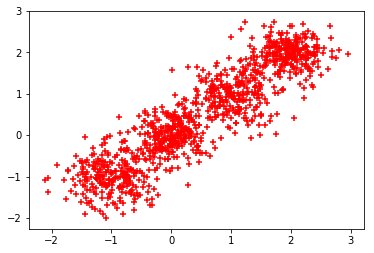

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='+', c='r')
plt.show()

In [ ]:
from sklearn.cluster import Birch
# threshold：叶节点每个CF的最大样本半径阈值T。默认值是0.5.如果样本的方差较大，则一般需要增大这个默认值。
# branching_factor：CF Tree内部节点的最大CF数B。默认是50。如果样本量非常大，则一般需要增大这个默认值。
# n_clusters：即类别数K，在BIRCH算法是可选的，如果类别数非常多，我们也没有先验知识，则一般输入None，此时BIRCH算法第4阶段不会运行。但是如果我们有类别的先验知识，则推荐输入这个可选的类别值。默认是3，即最终聚为3类。
# compute_labels：布尔值，表示是否标示类别输出，默认是True。一般使用默认值挺好，这样可以看到聚类效果。

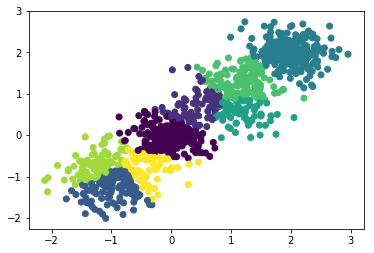

In [8]:
# 未指定类别数
# n_clusters：即类别数K，在BIRCH算法是可选的，如果类别数非常多，我们也没有先验知识，则一般输入None，
# 此时BIRCH算法第4阶段不会运行。但是如果我们有类别的先验知识，则推荐输入这个可选的类别值。默认是3，即最终聚为3类。
y_pred = Birch(n_clusters=None).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='+')
plt.show()

In [ ]:
# 当我们不输入类别的时候，BIRCH算法的聚类效果并不一定好，因此这个可选的类别数K一般还是需要调参的。

In [10]:
from sklearn import metrics
print("Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score 2220.952539045443


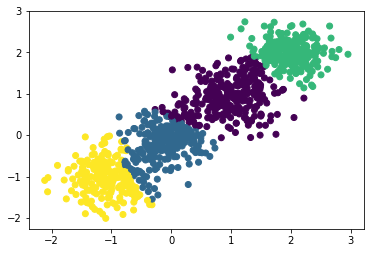

Calinski-Harabasz Score 2816.407652684516


In [11]:
# 指定类别数为4
y_pred = Birch(n_clusters = 4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='+')
plt.show()
print("Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred))

In [14]:
# threshold:即叶节点每个CF的最大样本半径阈值T，它决定了每个CF里所有样本形成的超球体的半径阈值。
# 一般来说threshold越小，则CF Tree的建立阶段的规模会越大，即BIRCH算法第一阶段所花的时间和内存会越多。
# 但是选择多大以达到聚类效果则需要通过调参决定。默认值是0.5.如果样本的方差较大，则一般需要增大这个默认值。
y_pred = Birch(n_clusters = 4, threshold = 0.1).fit_predict(X)
print("Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score 2155.10021807852


In [13]:
#  branching_factor：即CF Tree内部节点的最大CF数B，以及叶子节点的最大CF数L。
# 这里scikit-learn对这两个参数进行了统一取值。也就是说，branching_factor决定了CF Tree里所有节点的最大CF数。
# 默认是50。如果样本量非常大，比如大于10万，则一般需要增大这个默认值。
# 选择多大的branching_factor以达到聚类效果则需要通过和threshold一起调参决定
y_pred = Birch(n_clusters = 4, threshold = 0.3, branching_factor = 20).fit_predict(X)
print("Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score 3301.8023106358173


In [15]:
y_pred = Birch(n_clusters = 4, threshold = 0.3, branching_factor = 10).fit_predict(X)
print("Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score 2800.878409621567
